<h1 style="color: #005993;">smoothing cross sectional profiles and detect sandbar crests and troughs...</h1>
<p>have shown an example case... pls check my <a href="https://salikathilakarathne.github.io/">personal webpage</a>  for more info/contact details. thanks. </p>

### libraries

In [50]:
#add needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

#to smoothen the profile
from scipy.ndimage import gaussian_filter1d

#to identify troughs and crests
from scipy.signal import find_peaks

#for scientific plots
import scienceplots

### functions

In [16]:
#changing the graphs defalt settings
def scientific_graphs():
    plt.rcdefaults()
    plt.rcParams.update({'font.size': 9,'mathtext.default':  'regular' })
#     plt.rcParams.update({'mathtext.default':  'regular' })
#     plt.style.use(['science','no-latex'])
    plt.style.use(['science','nature'])
    
def default_graphs():
    plt.rcdefaults()
    plt.rcParams.update({'font.size': 9})    

### profile data

In [62]:
#I have only included one single example profile. Better to add your data from csv...
profile_cordx = np.arange(0,501,5)
profile_ele = [ 4.0900000e+00,  3.7900000e+00,  4.0600000e+00,  4.0100000e+00,
        4.1900000e+00,  4.0500000e+00,  3.7300000e+00,  3.4100000e+00,
        3.1400000e+00,  2.8800000e+00,  2.7700000e+00,  2.5900000e+00,
        2.4500000e+00,  2.3600000e+00,  2.3100000e+00,  2.1700000e+00,
        1.9500000e+00,  1.7900000e+00,  1.6200000e+00,  1.4500000e+00,
        1.2500000e+00,  1.1600000e+00,  9.9000000e-01,  8.7000000e-01,
        7.4000000e-01,  6.2000000e-01,  5.1000000e-01,  4.3000000e-01,
        3.6000000e-01,  1.7000000e-01,  1.4000000e-01,  1.2000000e-01,
        1.0000000e-01, -7.0000000e-02, -7.2000000e-01, -9.8000000e-01,
       -1.0500000e+00, -1.4500000e+00, -1.6900000e+00, -1.8000000e+00,
       -2.2900000e+00, -1.9900000e+00, -1.8500000e+00, -1.4900000e+00,
       -1.1300000e+00, -7.7000000e-01, -6.5000000e-01, -8.1000000e-01,
       -8.4000000e-01, -1.0300000e+00, -1.4300000e+00, -1.3400000e+00,
       -1.9000000e+00, -2.0100000e+00, -2.0300000e+00, -2.2100000e+00,
       -2.4700000e+00, -2.7200000e+00, -2.7500000e+00, -2.7800000e+00,
       -2.8200000e+00, -3.0200000e+00, -3.3600000e+00, -3.5300000e+00,
       -3.6900000e+00, -3.8600000e+00, -3.6800000e+00, -3.5900000e+00,
       -3.4900000e+00, -3.4800000e+00, -3.4400000e+00, -3.4000000e+00,
       -3.4300000e+00, -3.4600000e+00, -3.4800000e+00, -3.5300000e+00,
       -3.5300000e+00, -3.5200000e+00, -3.6300000e+00, -3.5900000e+00,
       -3.5400000e+00, -3.6300000e+00, -3.5900000e+00, -3.5400000e+00,
       -3.6700000e+00, -3.6900000e+00, -3.7000000e+00, -3.8600000e+00,
       -3.8500000e+00, -3.8300000e+00, -3.9800000e+00, -4.0100000e+00,
       -4.0400000e+00, -4.1400000e+00, -4.1700000e+00, -4.2000000e+00,
       -4.4900000e+00, -4.5600000e+00, -4.6300000e+00, -4.8100000e+00,
       -5.1500000e+00]

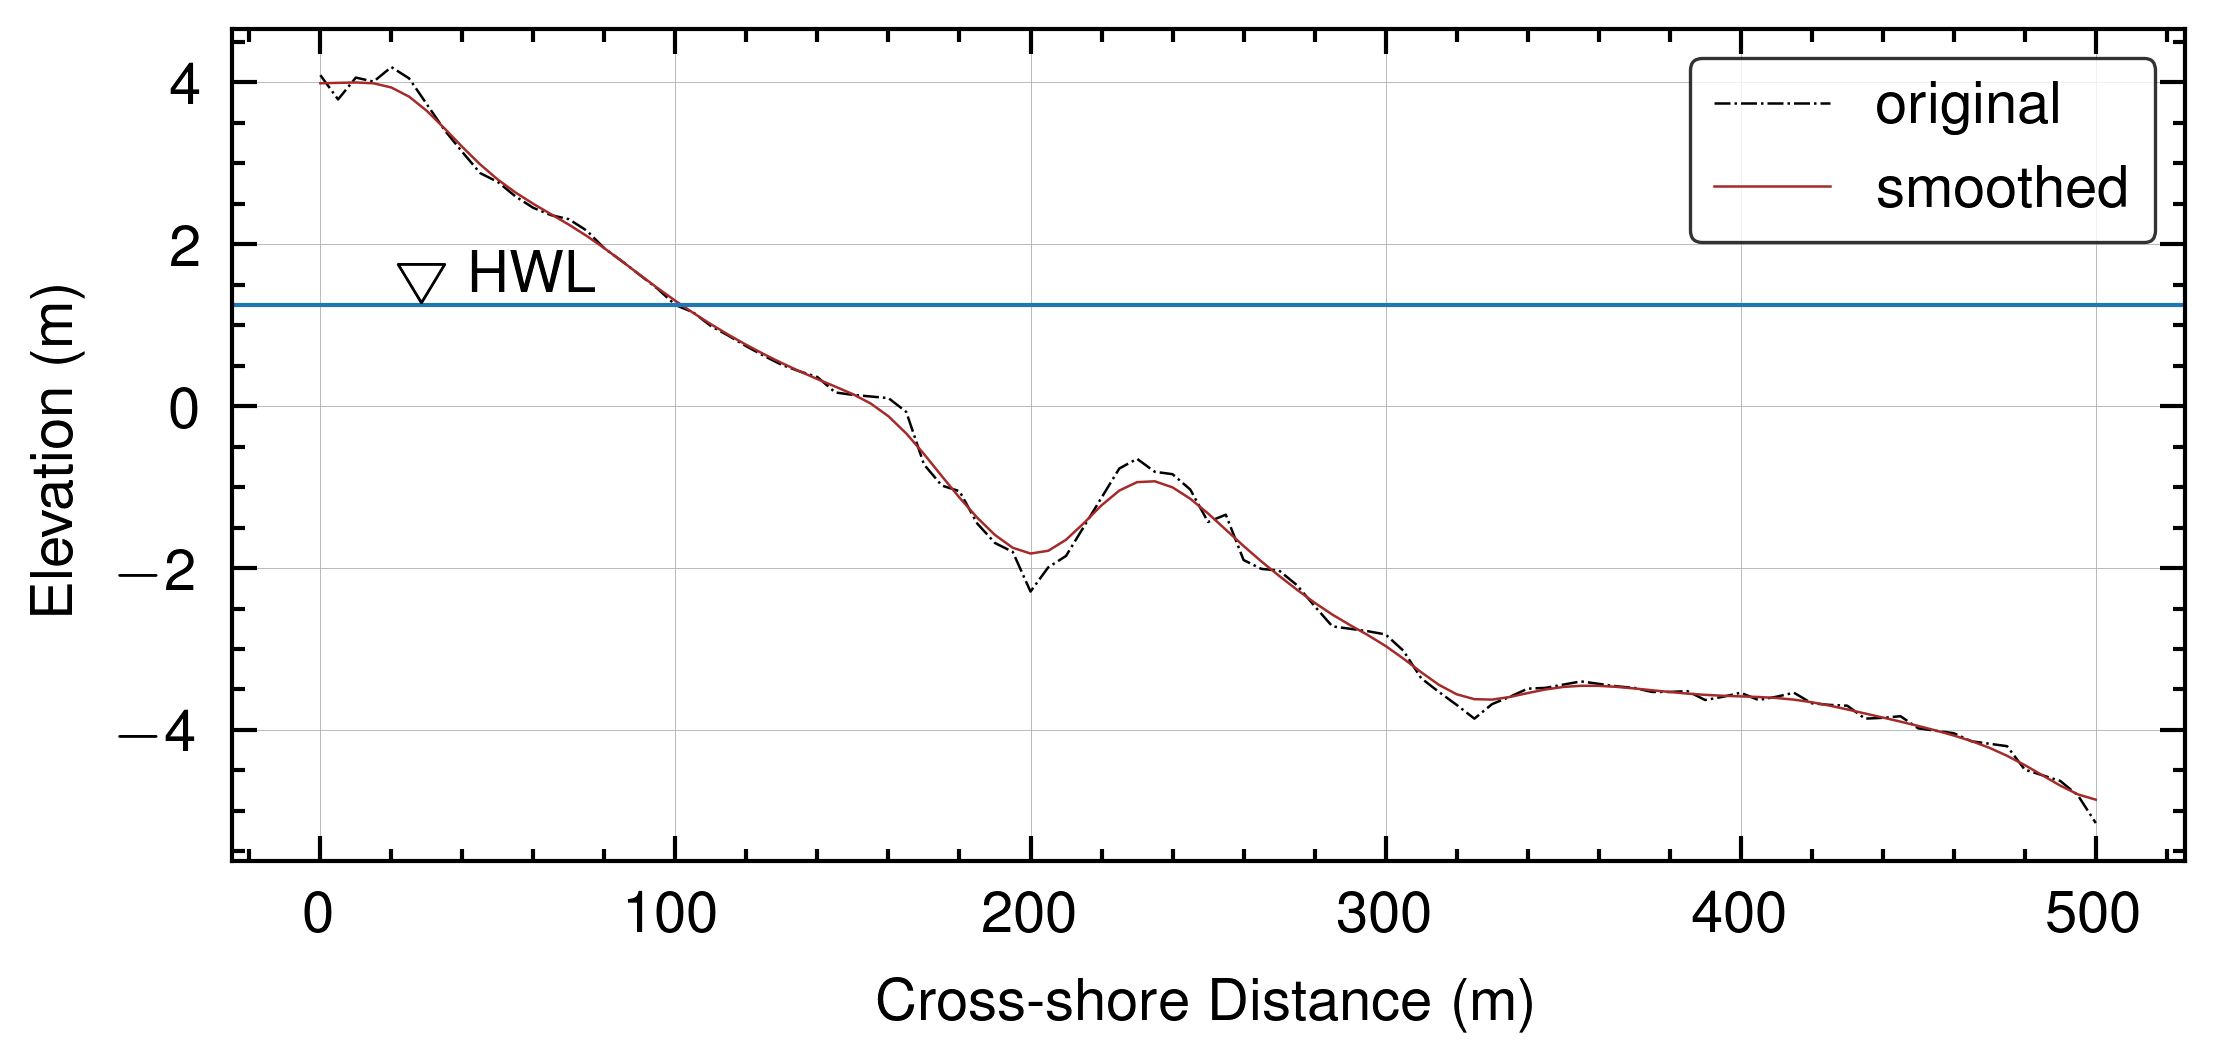

In [70]:
scientific_graphs()
fig, axs = plt.subplots(1, 1,figsize = (4.2,1.8),dpi = 600)
plt.plot(profile_cordx,profile_ele, 'k-.', linewidth = 0.3, label = 'original')
plt.plot(profile_cordx,gaussian_filter1d(profile_ele, sigma=2), 'brown', linewidth = 0.3, label = 'smoothed')
plt.text(50, 1.252, r'$\bigtriangledown$ HWL', ha="center", va="bottom")

#water level
plt.axhline(y = 1.252, color = 'tab:blue', linewidth = 0.5) 

plt.grid(which = 'major',linewidth =0.1)
plt.xlabel(' Cross-shore Distance (m)') 
plt.ylabel('Elevation (m) ')
legend = plt.legend(loc = "upper right",frameon = True)
legend.get_frame().set_linewidth(0.4)
legend.get_frame().set_edgecolor("k")
plt.show()

### feature detection

In [64]:
dummy_smthed = gaussian_filter1d(profile_ele, sigma=2)
peaks, _ = find_peaks(dummy_smthed, height=-6)
trough, _ = find_peaks(-dummy_smthed, height=-6)

In [65]:
peaks

array([ 2, 47, 71], dtype=int64)

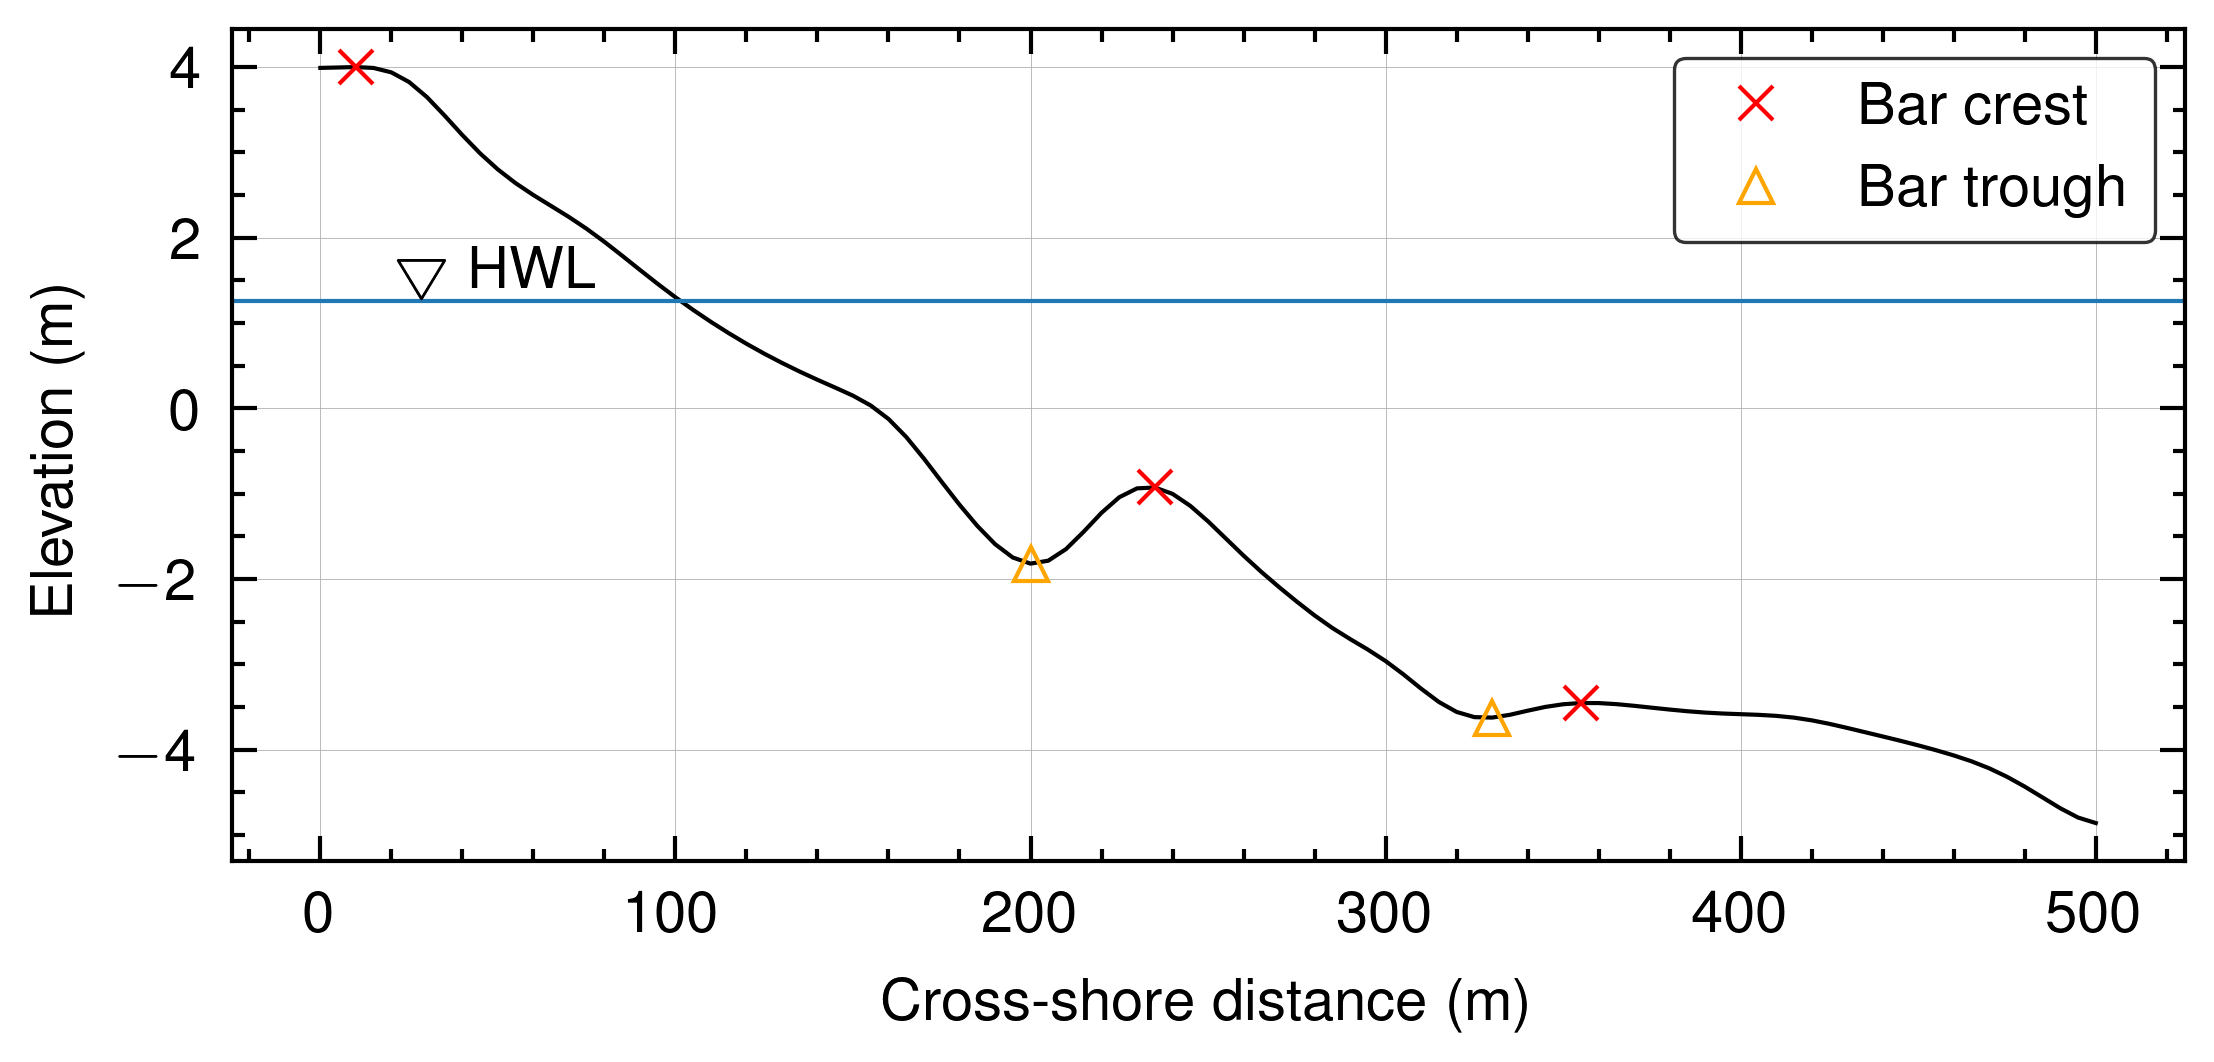

In [69]:
fig, axs = plt.subplots(1, 1,figsize = (4.2,1.8),dpi = 600)
plt.plot(profile_cordx,dummy_smthed,'k-',linewidth = 0.5)
plt.text(50, 1.252, r'$\bigtriangledown$ HWL', ha="center", va="bottom")
plt.plot(peaks*5, dummy_smthed[peaks], "x",markersize = 4,
         mew=0.5,mec='r', mfc='w', label = 'Bar crest')
plt.plot(trough*5, dummy_smthed[trough], "^",ms = 4,
         mew=0.5,mec='orange', mfc='None', label = 'Bar trough')
plt.grid(linewidth = 0.1)
#water level
plt.axhline(y = 1.252, color = 'tab:blue', linewidth = 0.5)  
plt.ylabel('Elevation (m)')
plt.xlabel('Cross-shore distance (m)')

legend = plt.legend(loc = "upper right",frameon = True)
legend.get_frame().set_linewidth(0.4)
legend.get_frame().set_edgecolor("k")
plt.show()